In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pathlib

path = pathlib.Path.cwd()

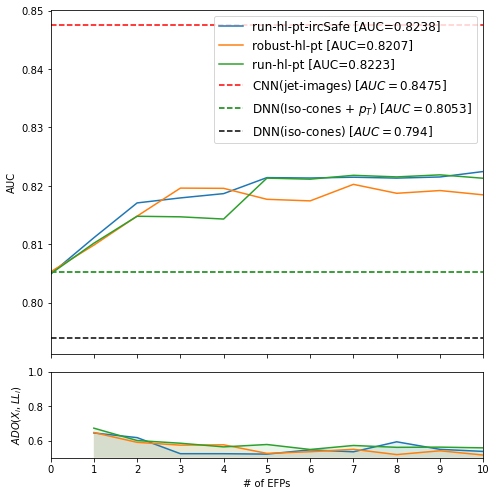

In [2]:
# Determine the number of completed passes
ll_benchmark = 0.8475
hl_only = 0.794

# Initialize plot
fig, (ax0, ax1) = plt.subplots(
    2, sharex=True, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1]}
)

run_path = path / "runs"
longest_run, hl_pt_max = 0, 0
for run in run_path.glob("*"):
    if not "adam" in str(run):
        try:
            # Get pass data
            df = pd.read_csv(run / "selected_efps.csv")
            pass_ix = df.index.values
            auc_ix = df.auc.values
    #         print(run)
    #         if "blackBox" not in run.stem:
    #             auc_ix[0] = hl_only
            ado_ix = df.ado.values
            ax0.plot(
                pass_ix,
                auc_ix,
                label=f"{run.stem} [AUC={max(auc_ix):.4}]",
            )
            ax0.set_ylabel("AUC")

            ax1.plot(pass_ix, ado_ix)
            ax1.fill_between(pass_ix, ado_ix, 0.5, alpha=0.1)
            ax1.set_ylim([0.5, 1.0])
            ax1.set_ylabel("$ADO(X_i, LL_i)$")
            if len(auc_ix) > longest_run:
                longest_run = len(auc_ix)
            if auc_ix[0] > hl_pt_max:
                hl_pt_max = auc_ix[0]
        except:
            pass
    
ax0.hlines(
    ll_benchmark,
    0,
    100,
    label=f"CNN(jet-images) $[AUC={ll_benchmark:.4}]$",
    color="r",
    linestyle="dashed",
)
ax0.hlines(
    hl_pt_max,
    0,
    100,
    label=f"DNN(Iso-cones + $p_T$) $[AUC={hl_pt_max:.4}]$",
    color="g",
    linestyle="dashed",
)
ax0.hlines(
    hl_only,
    0,
    100,
    label=f"DNN(iso-cones) $[AUC={hl_only:.4}]$",
    color="k",
    linestyle="dashed",
)

# ax0.legend(bbox_to_anchor=(1.05, 1.05), loc="lower right", ncol=3, fontsize=12)
ax0.legend(fontsize=12)
x_end = 10 # longest_run-1
plt.xlim([0, x_end])
plt.xlabel("# of EFPs")

# plt.xticks(pass_ix)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

fig.subplots_adjust(hspace=0.1)
plt.tight_layout()
plt.show()